## DAFTAR ISI
• Perkenalan.<br>
• Exploratory Data Analysis / Deskriptif Analisis.<br>
• Inferencial Analysis.<br>

# PERKENALAN

Data 'HR_comma_sep.csv' berisi data informasi karyawan yang resign dan karyawan yang tidak resign / stay dalam suatu perusahaan. Adapun penjelasan kolom dari data tersebut yaitu : <br>
1.Satisfaction_level = Tingkat kepuasan karyawan.<Br>
2.Last_evaluation = Tingkat penilaian kinerja karyawan.<Br>
3.Number_project = Jumlah project yang dikerjakan karyawan.<Br>
4.Average_montly_hours = Rata-rata waktu yang dihabiskan karyawan per bulan.<br>
5.Time_spend_company = Waktu berapa lama karyawan bekerja dalam tahun.<br>
6.Work_accident = Informasi apakah pernah terjadi kecelakaan kerja atau tidak.<br>
7.Left = Informasi apakah karyawan resign atau tidak.<br>
8.Promotion_last_5years = Informasi apakah karyawan pernah dipromosikan atau tidak dalam 5 tahun terakhir.<br>
9.Department = Departemen karyawan bekerja.<br>
10.Salary = Gaji karyawan.

# Exploratory Data Analysis

In [1]:
#import library yang diperlukan.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from treeinterpreter import treeinterpreter as ti
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
sns.set() #setting style untuk plot.

In [2]:
#persiapan data.
df = pd.read_csv('HR_comma_sep.csv').convert_dtypes(convert_floating=False, convert_integer=False) #convert data type object ke data yang sesuai.
df.rename(columns = {'sales' : 'department'}, inplace=True)
df.drop_duplicates(inplace=True)
df.info() #tidak ada null value, duplicate sudah didrop, data type sudah diubah, data siap dianalisa!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  string 
 9   salary                 11991 non-null  string 
dtypes: float64(2), int64(6), string(2)
memory usage: 1.0 MB


In [3]:
#melihat data
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


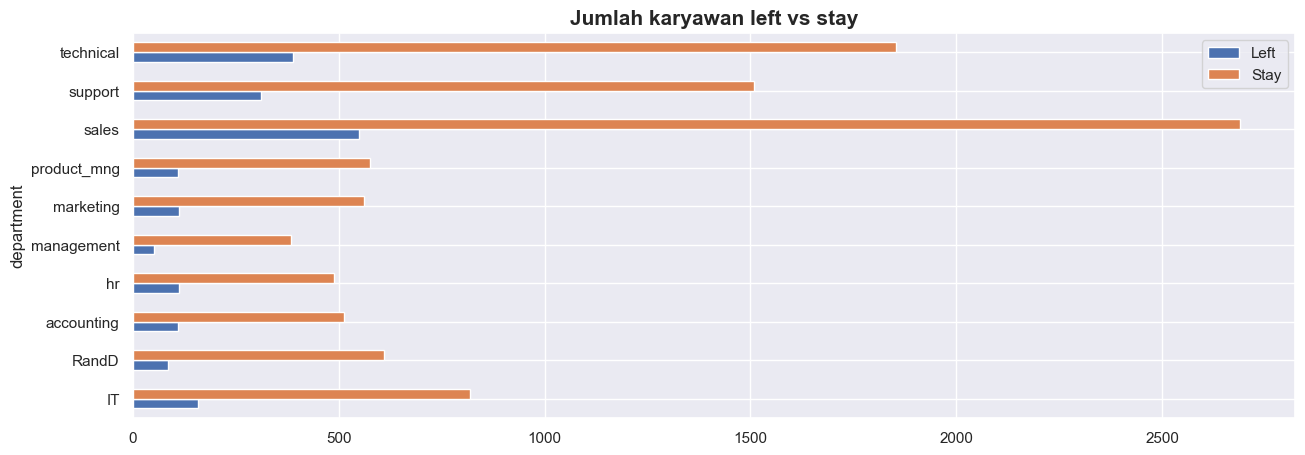

In [4]:
#memplot jumlah karyawan.
df.groupby('department')[['left']].agg(Left = ('left', lambda x: x.sum()), Stay = ('left',lambda x: (x == 0).sum())).plot(kind='barh',figsize=(15,5))
plt.title("Jumlah karyawan left vs stay", fontweight='bold', size=15)
plt.show()

Bisa dilihat bahwa karyawan terbanyak ada pada divisi sales, support dan technical sedangkan untuk karyawan yang paling sedikit ada di divisi management, hr dan accounting.

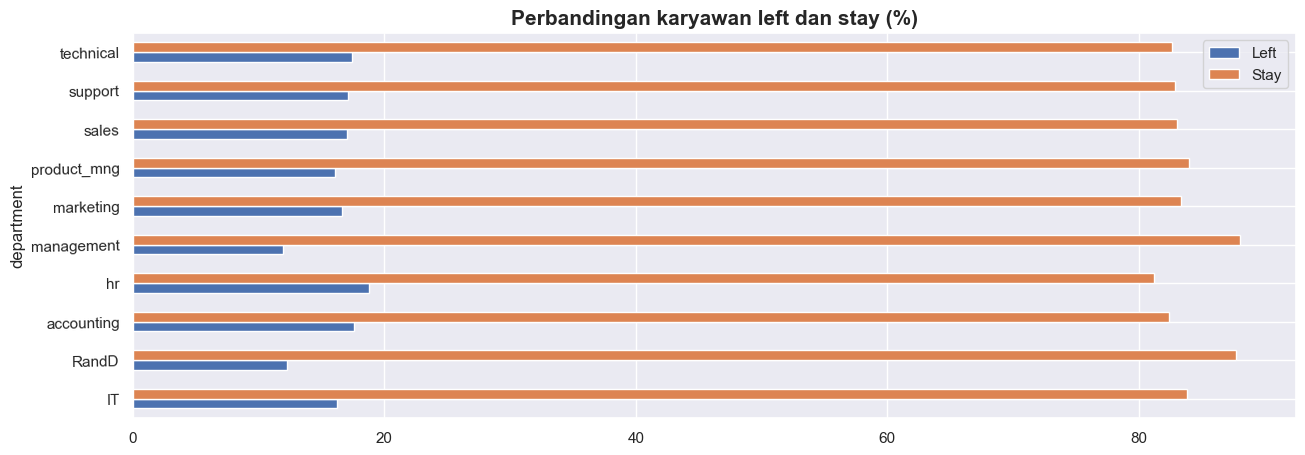

In [5]:
#memplot perbandingan karyawan left dan stay.
df.groupby('department')[['left']].agg(Left = ('left', lambda x: x.sum() * 100 / x.count()), Stay = ('left',lambda x: (x == 0).sum() * 100 / x.count())).plot(kind='barh',figsize=(15,5),rot=True)
plt.title("Perbandingan karyawan left dan stay (%)", fontweight='bold', size=15)
plt.show()

Untuk perbandingan karyawan left dan stay ditiap departemen sebenarnya cukup seimbang yaitu kira-kira ada diangka +- 15%. Departemen dengan perbandingan karyawan left terbanyak ada pada departemen HR dan yang paling sedikit ada di departemen management.

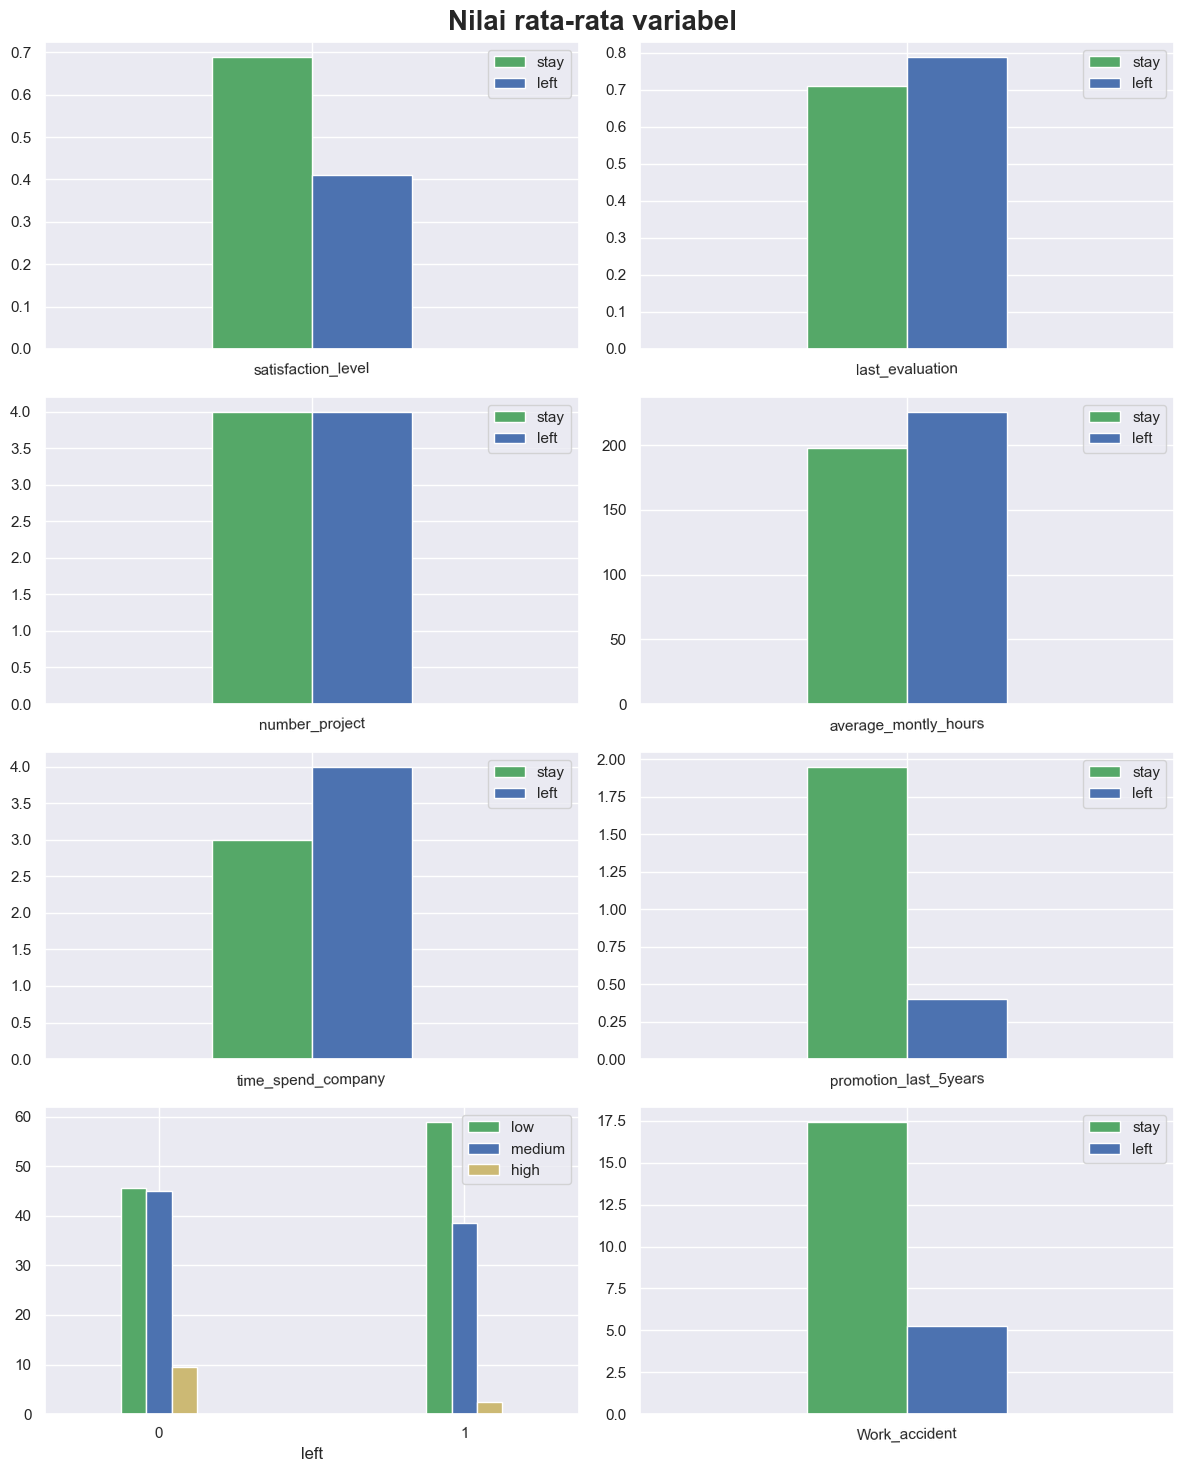

In [6]:
#membuat plot rata-rata nilai per predictor variabel.
fig, axarr = plt.subplots(4, 2,figsize=(12,15))
n = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']
a,b = 0,0
for y in n:
    df.groupby('left')[[y]].agg('median').T.plot(ax = axarr[a,b],kind='bar',rot=True,color=['g','b'],width=0.3)
    axarr[a,b].legend(['stay','left'])
    if b == 0:
        b = 1
    else:
        b = 0
    if n.index(y) == 1 or n.index(y) == 3:
        a += 1
df.groupby('left')[['promotion_last_5years']].agg(lambda x: x.sum() * 100 / x.count()).T.plot(ax = axarr[2,1],kind='bar',rot=True,color=['g','b'],width=0.3)
df.groupby(by = ['left'])[['salary']].agg(low = ('salary' ,lambda x: (x == 'low').sum() * 100 / x.count()),medium = ('salary' ,lambda x: (x == 'medium').sum() * 100 / x.count()),high = ('salary' ,lambda x: (x == 'high').sum() * 100 / x.count())).plot(ax = axarr[3,0],kind='bar',rot=True,color=['g','b','y'],width=0.25)
df.groupby('left')[['Work_accident']].agg(lambda x: x.sum() * 100 / x.count()).T.plot(ax = axarr[3,1],kind='bar',rot=True,color=['g','b'],width=0.3)
axarr[2,1].legend(['stay','left'])
axarr[3,1].legend(['stay','left'])
plt.suptitle("Nilai rata-rata variabel", fontweight='bold', size=20)
plt.tight_layout()
plt.show()

Nilai karyawan yang stay lebih besar dari yang left pada satisfaction_level, work_accident dan promotion_last_5years. Sisanya, nilai karyawan left lebih besar dari pada yang stay kecuali untuk number_project dimana nilainya equal/sama.Pada variable salary, bisa dilihat gaji low karyawan left jauh lebih tinggi dari gaji medium dan high sedangkan pada karyawan stay selisih gaji low pada medium terpaut sedikit begitu juga karyawan dengan gaji high yang lebih tinggi dari pada gaji high karyawan left.(plot gaji diatas menunjukan porsi dalam %)

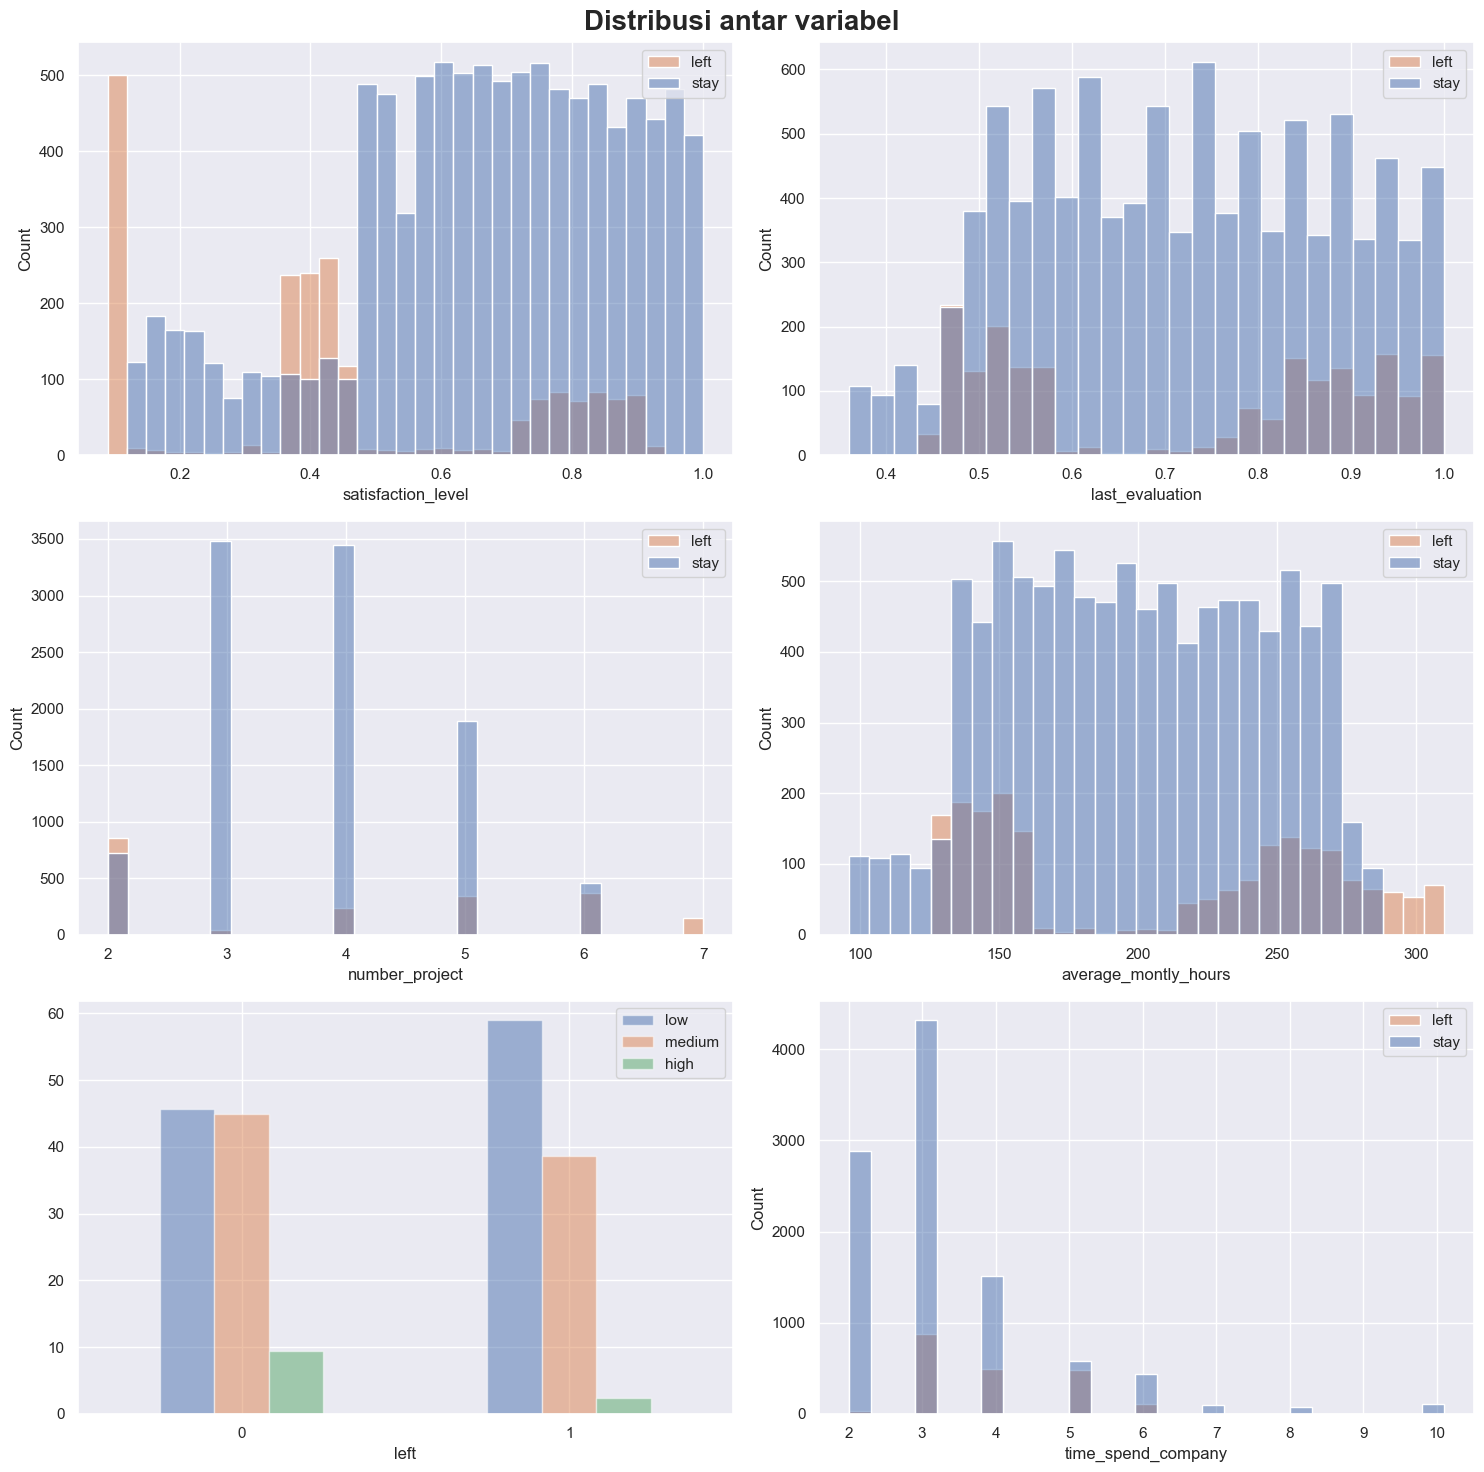

In [7]:
#plot distribusi variabel predictor vs response variabel
fig, axarr = plt.subplots(3, 2,figsize=(15,15))
a,b = 0,0
z = ['satisfaction_level','last_evaluation','number_project','average_montly_hours']
for x in z:
    sns.histplot(data=df, x =x,hue='left',ax = axarr[a,b])
    axarr[a,b].legend(['left','stay'])
    if b == 0:
        b = 1
    else:
        b = 0
    if z.index(x) == 1 :
        a = 1
        
k = df.groupby(by='left')[['salary']].agg(low = ('salary',lambda x: x.value_counts()['low'] / len(x) * 100), medium = ('salary',lambda x: x.value_counts()['medium'] / len(x) * 100),high = ('salary', lambda x: x.value_counts()['high'] / len(x) * 100))
k.plot(kind='bar',rot=True, alpha=0.5, ax = axarr[2,0])
sns.histplot(data=df, x ='time_spend_company',hue='left',ax = axarr[2,1],binwidth=0.3)
axarr[2,1].legend(['left','stay'])
plt.subplots_adjust(hspace = 0.5) 
plt.suptitle("Distribusi antar variabel",fontweight='bold',size=20)
plt.tight_layout()
plt.show()

Pada distribusi satisfaction level, bisa dilihat bahwa untuk karyawan left frekuensi nilai rendah cukup banyak dibandingkan nilai yang tinggi ini merupakan kebalikan dari karyawan yang stay.

# Inferencial Analysis

In [8]:
dfnew = df.copy()
dfnew.drop(columns='department',inplace=True)
dfnew['salary'] = dfnew.apply(lambda x: 1 if x['salary'] == 'low' else 2 if x['salary'] == 'medium' else 3, axis = 1)
dfnew.corr()[['left']]

,left
satisfaction_level,-0.350558
last_evaluation,0.013520
number_project,0.030928
average_montly_hours,0.070409
time_spend_company,0.173295
Work_accident,-0.125436
left,1.000000
promotion_last_5years,-0.044657
salary,-0.118882


Diatas adalah tabel correlation antara variabel predictor dan variable response. Semakin mendekati angka 0 maka hubungan semakin lemah, semakin mejauhi angka 0 maka hubungan semakin kuat ( -1 < PV < 1). Bisa dilihat bahwa satisfaction level merupakan predictor dengan hubungan paling kuat.

In [9]:
#membuat parameter untuk hyperparameter tuning.
param_grid = {
 'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 150, 200, 400, 600, 800, 1000]
}

In [10]:
#menggunakan randomizedsearchcv untuk hyperparameter tuning & model validation.
randomcv = RandomizedSearchCV(RandomForestClassifier() , param_grid, cv=5, n_jobs=-1, n_iter=5)
randomcv.fit(dfnew.drop(columns='left') , dfnew.left)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200, 400,
                                                         600, 800, 1000]})

In [11]:
pd.DataFrame(randomcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.925400,0.812052,0.184997,0.009861,600,10,2,None,40,True,"{'n_estimators': 600, 'min_samples_split': 10,...",0.988328,0.981651,0.984570,0.983319,0.978732,0.983320,0.003177,2
1,1.629061,0.287186,0.023473,0.006468,50,5,4,None,60,False,"{'n_estimators': 50, 'min_samples_split': 5, '...",0.979158,0.975813,0.980400,0.977481,0.977898,0.978150,0.001553,5
2,16.967247,0.732060,0.245237,0.035682,1000,10,2,None,40,True,"{'n_estimators': 1000, 'min_samples_split': 10...",0.988328,0.981651,0.984153,0.983319,0.978732,0.983237,0.003149,3
3,1.232306,0.188292,0.049709,0.011587,100,5,2,auto,70,False,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.986244,0.981234,0.984570,0.984987,0.981234,0.983654,0.002051,1
4,0.913761,0.145052,0.038395,0.002973,100,5,4,auto,10,False,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.986244,0.980400,0.982902,0.984153,0.979983,0.982737,0.002340,4


Bisa dilihat bahwa mean test score untuk setiap model sangat bagus yaitu ada di angka 98% - 99%.

In [12]:
#mengambil model random forest dengan nilai akurasi mean terbagus.
model = RandomForestClassifier(n_estimators=400,min_samples_split=10,min_samples_leaf=1,max_features=None,max_depth = 70, bootstrap=True) 

In [13]:
#melatih model
model.fit(dfnew.drop(columns='left'), dfnew.left)

RandomForestClassifier(max_depth=70, max_features=None, min_samples_split=10,
                       n_estimators=400)

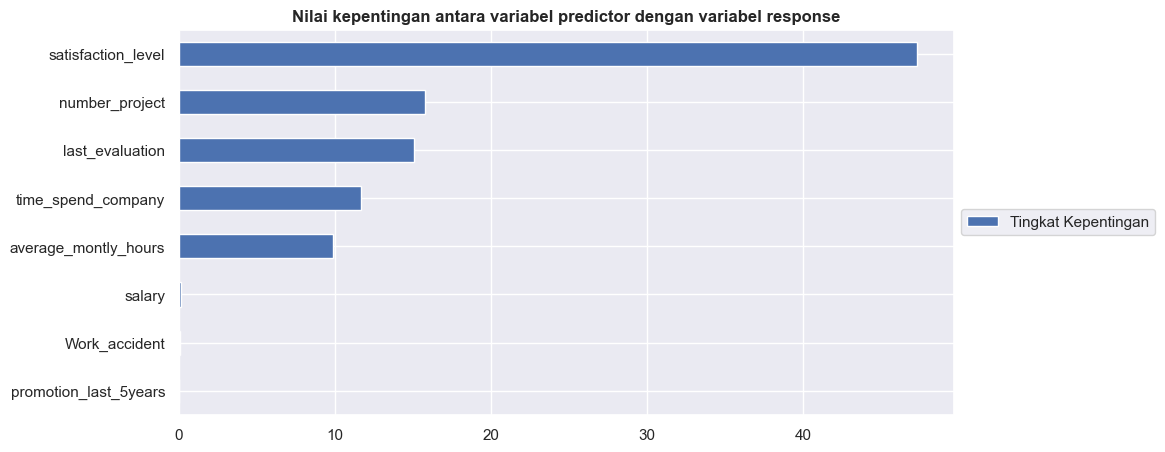

In [14]:
pd.DataFrame(model.feature_importances_ * 100 , dfnew.drop(columns='left').columns , columns = ['Nilai Kepentingan']).sort_values('Tingkat Kepentingan').plot(kind='barh',figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Nilai kepentingan antara variabel predictor dengan variabel response", fontweight='bold')
plt.show()

Plot diatas menunjukan hubungan antara variabel predictor dengan variabel response. Bisa dilihat bahwa satisfaction_level adalah faktor yang paling menentukan apakah karyawan left atau stay sedangkan promotion_last_5years dan salary adalah faktor yang paling kecil yang berpengaruh terhadap karyawan akan left dan tidak.

In [15]:
#membuat function untuk menginterpret bagaimana model membuat prediksi menggunakan tree interpreter.
def interpreterr(data,rf):
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df3 = pd.DataFrame()
    for x in range(0,len(data)):
        prediction, bias, contributions = ti.predict(rf, data.to_numpy()[x].reshape(1,8))
        prediction = pd.DataFrame(prediction[0]).T[[1]]
        bias = pd.DataFrame(bias[0]).T[[1]]
        df1 = pd.concat([df1, pd.DataFrame(contributions[0])[[1]].T], axis=0,ignore_index=True)
        df2 = pd.concat([df2, prediction],axis=0,ignore_index=True)
        df3 = pd.concat([df3, bias],axis=0,ignore_index=True)
    df1 = df1 * 100
    df1.columns = data.columns
    df2.columns = ['predict']
    df3.columns = ['bias']
    df1['bias'] = df3.bias * 100
    df1['predict-to-left'] = df2.predict * 100
    return df1
        

In [16]:
a = interpreterr(dfnew.drop(columns='left').head(10), model)
a

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,bias,predict-to-left
0,31.240377,11.418592,35.038476,5.404836,0.045589,0.000309,0.0,0.229271,16.62255,100.000000
1,-1.541507,26.281627,4.703566,18.759941,35.024626,0.240657,0.0,-0.920374,16.62255,99.171086
2,96.986152,0.000000,-13.608702,0.000000,0.000000,0.000000,0.0,0.000000,16.62255,100.000000
3,-4.049436,18.005159,5.118381,7.766268,35.882337,0.183917,0.0,-0.058947,16.62255,79.470231
4,31.240377,11.418592,35.038476,5.404836,0.045589,0.000309,0.0,0.229271,16.62255,100.000000
5,31.240377,11.418592,35.038476,5.404836,0.045589,0.000309,0.0,0.229271,16.62255,100.000000
6,96.986152,0.000000,-13.608702,0.000000,0.000000,0.000000,0.0,0.000000,16.62255,100.000000
7,-5.337844,26.141599,4.772662,17.920064,35.920081,0.420626,0.0,0.001899,16.62255,96.461635
8,-1.912981,27.919321,4.674536,16.239826,36.079261,0.288579,0.0,0.005575,16.62255,99.916667
9,31.240377,11.427093,35.038476,5.399867,0.045589,0.000309,0.0,0.225739,16.62255,100.000000


Dataframe diatas berisi bagaimana prediksi dibuat berdasarkan setiap employee. Prediksi = bias + feature-1 + feature-2 + ... + feature-n. Contoh, pada row index nomor 3 nilai terbesar yang disumbang ada pada variabel time_spend_company yaitu 40.6. Bisa disimpulkan pada employee index 3 alasan terbesarnnya untuk resign dikarenakan time_spend_company.

In [17]:
confidence = pd.DataFrame(([k.predict_proba(dfnew.drop(columns='left').values)[:,1] for k in model.estimators_])).T
dfnew['pred_mean'] = confidence.apply(axis=1 , func=lambda x: x.mean()).round(2).to_numpy() * 100
dfnew['pred_stdD'] = confidence.apply(axis=1 , func=lambda x: x.std()).round(3).to_numpy()
dfnew

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,pred_mean,pred_stdD
0,0.38,0.53,2,157,3,0,1,0,1,100.0,0.000
1,0.80,0.86,5,262,6,0,1,0,2,99.0,0.056
2,0.11,0.88,7,272,4,0,1,0,2,100.0,0.000
3,0.72,0.87,5,223,5,0,1,0,1,79.0,0.235
4,0.37,0.52,2,159,3,0,1,0,1,100.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,3,3.0,0.100
11996,0.74,0.95,5,266,10,0,0,1,3,0.0,0.000
11997,0.85,0.54,3,185,10,0,0,1,3,0.0,0.034
11998,0.33,0.65,3,172,10,0,0,1,3,1.0,0.057


Confidence adalah tingkat kepercayaan dari suatu model membuat sebuah prediksi. Prediksi Random Forest diambil dari hasil mean/rata-rata prediksi dari banyak decision tree. Jika prediksi dibuat berdasarkan hasil mean prediksi decision tree maka confidence level nya adalah standard deviation dari prediksi decision tree tersebut. Semakin tinggi standard deviation maka confidence levelnya semakin rendah.

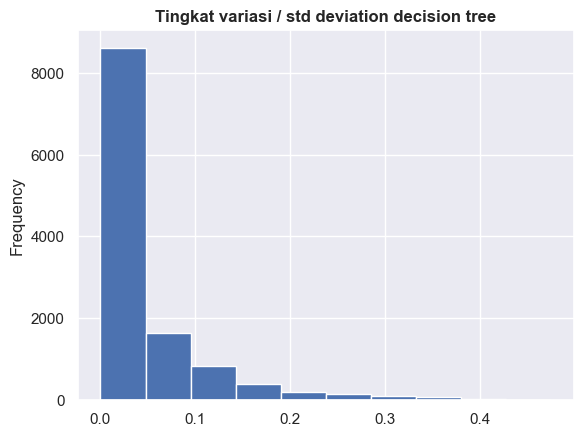

In [18]:
dfnew['pred_stdD'].plot(kind='hist')
plt.title("Tingkat variasi / std deviation decision tree", fontweight='bold')
plt.show()

Bisa dilihat bahwa std deviationnya cukup kecil, ini berarti bahwa rata-rata confidence level disetiap prediksi cukup tinggi.

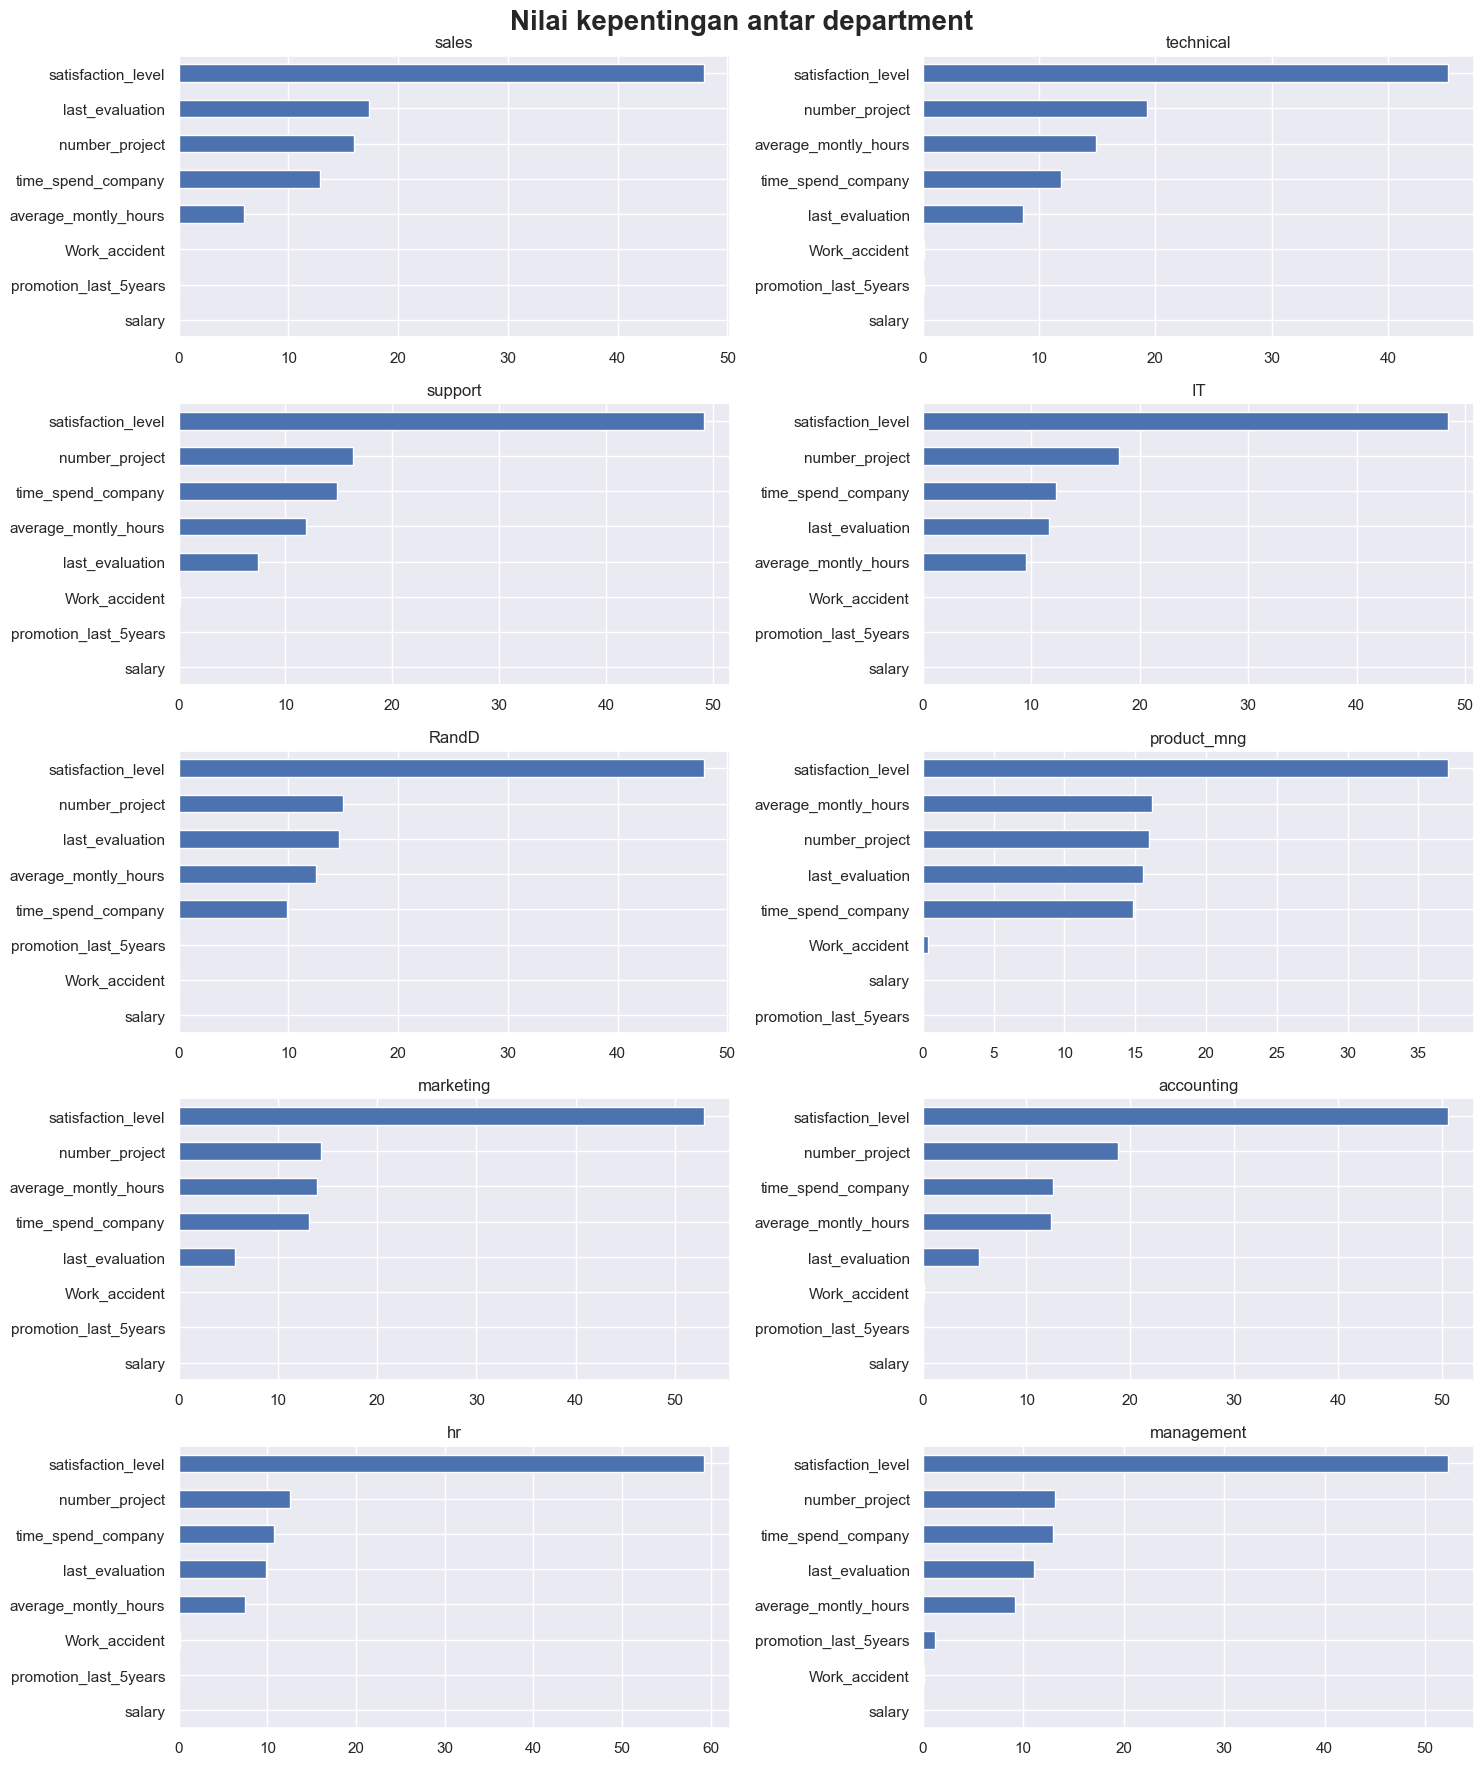

In [22]:
#plot nilai kepentingan antar departemen.
fig, axarr = plt.subplots(5, 2,figsize=(15,18))
z = list(df['department'].value_counts().index)
a,b = 0,0
for x in z:
    dfnew1 = df[df['department'] == x].copy()
    dfnew1.drop('department', axis=1,inplace=True)
    dfnew1['salary'] = dfnew.apply(lambda x: 1 if x['salary'] == 'low' else 2 if x['salary'] == 'medium' else 3, axis = 1)
    model.fit(dfnew1.drop(columns='left'), dfnew1.left)
    pd.DataFrame(model.feature_importances_ * 100 , dfnew1.drop(columns='left').columns , columns = ['Tingkat Kepentingan']).sort_values('Tingkat Kepentingan').plot(kind='barh',ax = axarr[a,b])
    axarr[a,b].set_title(x, fontsize=12)
    axarr[a,b].get_legend().remove()
    if b == 0:
        b = 1
    else:
        b = 0
    if z.index(x) in [1,3,5,7]:
        a += 1
plt.suptitle('Nilai kepentingan antar department', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


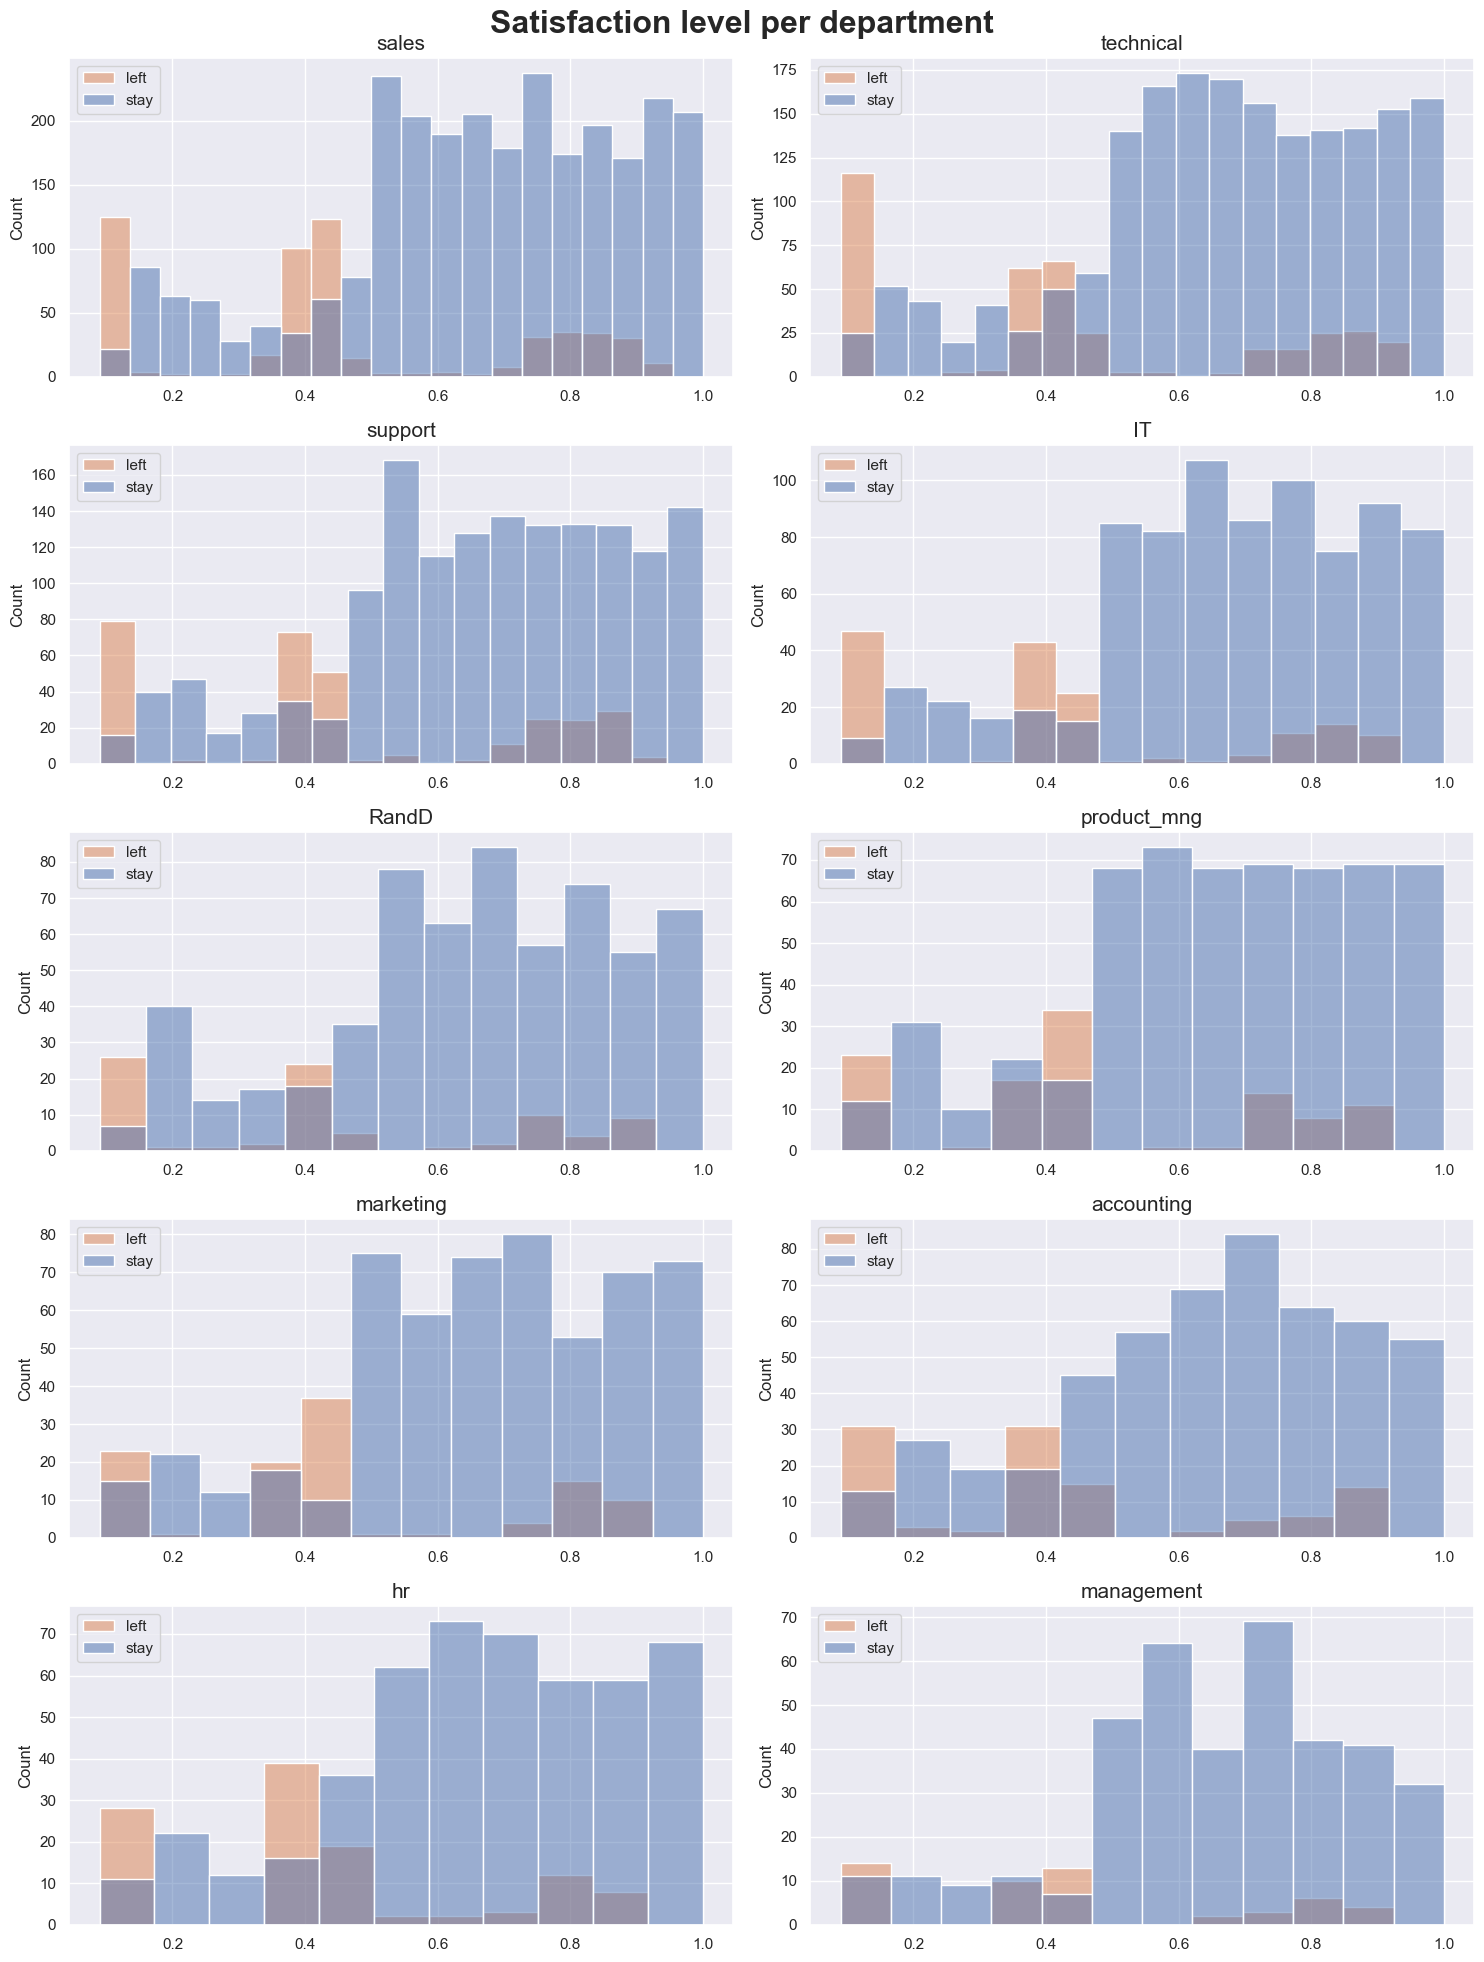

In [20]:
#plot distribusi satisfaction_level antar departemen.
fig, axarr = plt.subplots(5, 2,figsize=(15,20))
z = list(df['department'].value_counts().index)
a,b = 0,0
for x in z:
    dfnew1 = df[df['department'] == x].copy()
    dfnew1.drop('department', axis=1,inplace=True)
    dfnew1['salary'] = dfnew.apply(lambda x: 1 if x['salary'] == 'low' else 2 if x['salary'] == 'medium' else 3, axis = 1)
    sns.histplot(data=dfnew1, x = 'satisfaction_level', hue='left',ax = axarr[a,b])
    axarr[a,b].set_title(x, fontsize=15)
    axarr[a,b].set(xlabel=None)
    axarr[a,b].legend(['left','stay'],loc='upper left')
    if b == 0:
        b = 1
    else:
        b = 0
    if z.index(x) in [1,3,5,7]:
        a += 1
plt.suptitle('Satisfaction level per department', fontsize=23, fontweight='bold')
plt.tight_layout()
plt.show()
